## Introduction


In this lab, we will build an image classifier using the VGG16 pre-trained model, and we will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model.

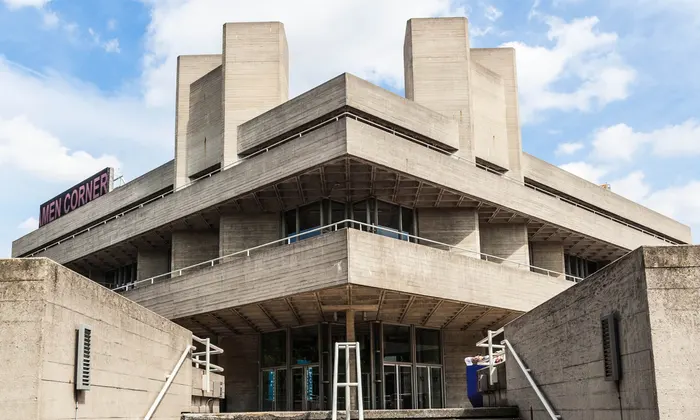

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
!pip install skillsnetwork 
import skillsnetwork
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [56]:
#Import VGG16 Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [55]:
#Import Resnet50 Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


## Import Data

In [2]:
## get the data
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip", overwrite=True)

  0%|          | 0/80045 [00:00<?, ?it/s]

Saved to '.'


After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

# Part 1 - VGG16 Model


In this part, we will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, we can import the model <code>VGG16</code> from <code>keras.applications</code>.

We will essentially build our classifier as follows:
1. Import libraries, modules, and packages we will need.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

##Define Global Constants


In [16]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

##Construct ImageDataGenerator Instances

In [17]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

## Train data

In [18]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


## Validation Data

In [19]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


## Build, Compile and Fit Model


In [20]:
model_VGG16 = Sequential()

In [21]:
model_VGG16.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [22]:
model_VGG16.add(Dense(num_classes, activation='softmax'))

In [23]:
model_VGG16.layers[0].trainable = False

In [24]:
model_VGG16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

## Fit the Model

In [27]:
fit_history = model_VGG16.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

<ipython-input-27-94959495bb15>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model_VGG16.fit_generator(


Epoch 1/2
301/301 [==============================] - 178s 553ms/step - loss: 0.1659 - accuracy: 0.9367 - val_loss: 0.0370 - val_accuracy: 0.9934
Epoch 2/2
301/301 [==============================] - 166s 553ms/step - loss: 0.0275 - accuracy: 0.9948 - val_loss: 0.0210 - val_accuracy: 0.9949


## Test Data

In [28]:
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 500 images belonging to 2 classes.


## Score

In [52]:
scores_VGG16 = model_VGG16.evaluate_generator(test_generator)
scores_VGG16

<ipython-input-52-66e61d14ef74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_VGG16 = model_VGG16.evaluate_generator(test_generator)


[0.017426954582333565, 0.9959999918937683]

In [53]:
print('The performance for VGG16 model:')
print(f"Loss: {scores_VGG16[0]}")
print(f"Accuracy: {scores_VGG16[1]}")

The performance for VGG16 model:
Loss: 0.017426954582333565
Accuracy: 0.9959999918937683


In [30]:
model_VGG16.save('classifier_VGG16_model.h5')

<a id="item43"></a>

# Part 2 - ResNet50 Model

In this part, we will evaluate your deep learning models on a test data. For this part, we will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


## Load ResNet50 Model

In [58]:
model_ResNet50 = keras.models.load_model('classifier_Resnet50_model.h5')

## Score

In [40]:
scores_ResNet50 = model_ResNet50.evaluate_generator(test_generator)
scores_ResNet50

<ipython-input-40-c318abea04b2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_ResNet50 = model_ResNet50.evaluate_generator(test_generator)


[0.0025083557702600956, 1.0]

In [50]:
print('The performance for ResNet50 model:')
print(f"Loss: {scores_ResNet50[0]}")
print(f"Accuracy: {scores_ResNet50[1]}")

The performance for ResNet50 model:
Loss: 0.0025083557702600956
Accuracy: 1.0


In [41]:
model_ResNet50.save('classifier_Resnet50_model.h5')

<a id="item44"></a>

# Part 3 - Predict

In this model, we will predict whether the images in the test data are images of cracked concrete or not. We will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. We can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. We should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [ ]:
predict_ResNet50 = model_ResNet50.predict_generator(test_generator)

In [ ]:
predict_VGG16 = model_VGG16.predict_generator(test_generator)

In [45]:
def pred(x):
  for i in x:
    j=np.argmax(i)
    if(j==0):
      print("Negetive")
    else:
      print("Positive")

## ResNet50 Prediction

In [46]:
pred(predict_ResNet50[0:5])

Negetive
Negetive
Negetive
Negetive
Negetive


##VGG16 Prediction

In [47]:
pred(predict_VGG16[0:5])

Negetive
Negetive
Negetive
Negetive
Negetive


## Test data

In [49]:
pred(test_generator.next()[1][0:5])

Negetive
Negetive
Negetive
Negetive
Negetive


# Conclusion

If we compare the two models of VGG16 and ResNet50, we can see that the loss factor is much lower in ResNet50 model with higher accuracy.
___

VGG16 model:

Loss: 0.017426954582333565

Accuracy: 0.9959999918937683
___
ResNet50 model:

Loss: 0.0025083557702600956

Accuracy: 1.0
___

Both models correctly predicted the test data to be Negative, eqaul to what we have in the test data.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).